# Tarea 1: Clasificación de Dígitos con Regresión Logística

## Objetivos de Aprendizaje

Al completar esta tarea, serás capaz de:

1. **Cargar y explorar** un dataset de clasificación real
2. **Aplicar Regresión Logística** para clasificación multiclase
3. **Evaluar modelos** usando métricas apropiadas (accuracy, precision, recall, F1-score)
4. **Interpretar matrices de confusión** para entender errores del modelo
5. **Visualizar resultados** y comunicar hallazgos
6. **Analizar errores** para mejorar la comprensión del modelo
7. **Comparar modelos** con diferentes configuraciones

---

## Contexto

El reconocimiento de dígitos escritos a mano es un problema clásico de Machine Learning con aplicaciones reales:

- **Procesamiento de cheques bancarios** (leer cantidades escritas a mano)
- **Clasificación automática de correo postal** (códigos postales)
- **Digitalización de documentos históricos**
- **Sistemas de entrada de datos**

Usaremos el **Digits Dataset** de scikit-learn, que contiene 1,797 imágenes de 8x8 píxeles de dígitos (0-9) escritos a mano.

---

## Parte 1: Carga y Exploración de Datos

In [1]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

# Configurar visualización
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
%matplotlib inline

### 1.1 Cargar el Dataset

**Instrucciones:** Carga el dataset de dígitos usando `load_digits()` de scikit-learn.

In [2]:
# TODO: Cargar el dataset de dígitos
digits = load_digits()

# Examinar la estructura del dataset
print("Claves disponibles en el dataset:")
print(digits.keys())

Claves disponibles en el dataset:
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


### 1.2 Exploración Básica

**Instrucciones:** Completa el código para responder las siguientes preguntas:
- ¿Cuántas muestras hay en el dataset?
- ¿Cuántas características (features) tiene cada muestra?
- ¿Cuántas clases diferentes existen?

In [4]:
# TODO: Obtener las dimensiones de X (features) y y (targets)
X = digits.data
y = digits.target

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"\nNúmero de muestras: {X.shape[0]}")
print(f"Número de características por muestra: {X.shape[1]}")
print(f"Número de clases únicas: {len(np.unique(y))}")
print(f"Clases: {np.unique(y)}")

Dimensiones de X: (1797, 64)
Dimensiones de y: (1797,)

Número de muestras: 1797
Número de características por muestra: 64
Número de clases únicas: 10
Clases: [0 1 2 3 4 5 6 7 8 9]


### 1.3 Distribución de Clases

**Instrucciones:** Verifica si el dataset está balanceado visualizando la distribución de las clases.

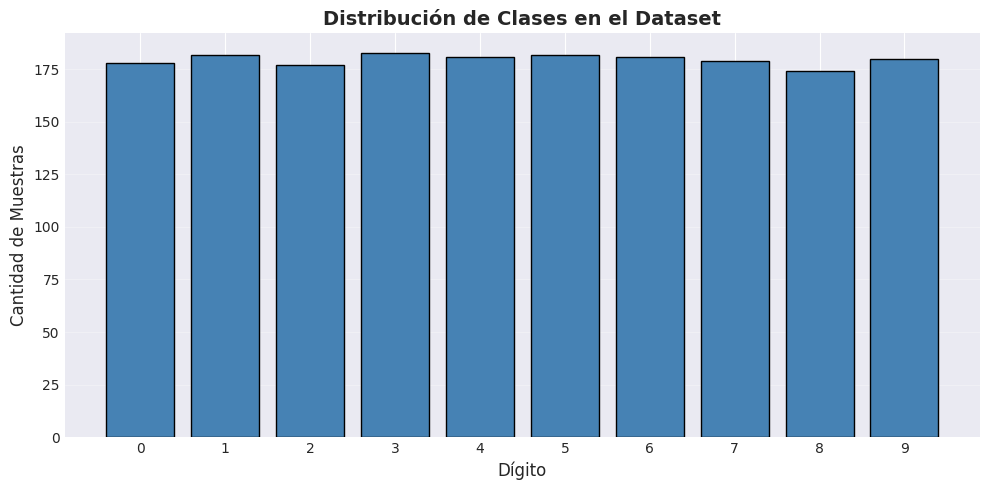


📊 Análisis de balance:
Dígito 0: 178 muestras
Dígito 1: 182 muestras
Dígito 2: 177 muestras
Dígito 3: 183 muestras
Dígito 4: 181 muestras
Dígito 5: 182 muestras
Dígito 6: 181 muestras
Dígito 7: 179 muestras
Dígito 8: 174 muestras
Dígito 9: 180 muestras


In [5]:
# TODO: Crear un gráfico de barras mostrando la cantidad de ejemplos por clase
clases_unicas, conteos = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(clases_unicas, conteos, color="steelblue", edgecolor="black")
plt.xlabel("Dígito", fontsize=12)
plt.ylabel("Cantidad de Muestras", fontsize=12)
plt.title("Distribución de Clases en el Dataset", fontsize=14, fontweight="bold")
plt.xticks(clases_unicas)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# TODO: ¿El dataset está balanceado? Justifica tu respuesta
print("\n📊 Análisis de balance:")
print("=" * 50)
for digito, conteo in zip(clases_unicas, conteos):
    print(f"Dígito {digito}: {conteo} muestras")

**✍️ PREGUNTA 1:** ¿El dataset está balanceado? ¿Por qué es importante esta información para el entrenamiento del modelo?

**TU RESPUESTA:**
```
Si esta balanceado, cada dígito tiene una cantidad muy parecida de muestras.
```

---

## Parte 2: Visualización de los Dígitos

### 2.1 Visualizar Ejemplos de Dígitos

**Instrucciones:** Visualiza algunos ejemplos del dataset para entender cómo lucen los dígitos.

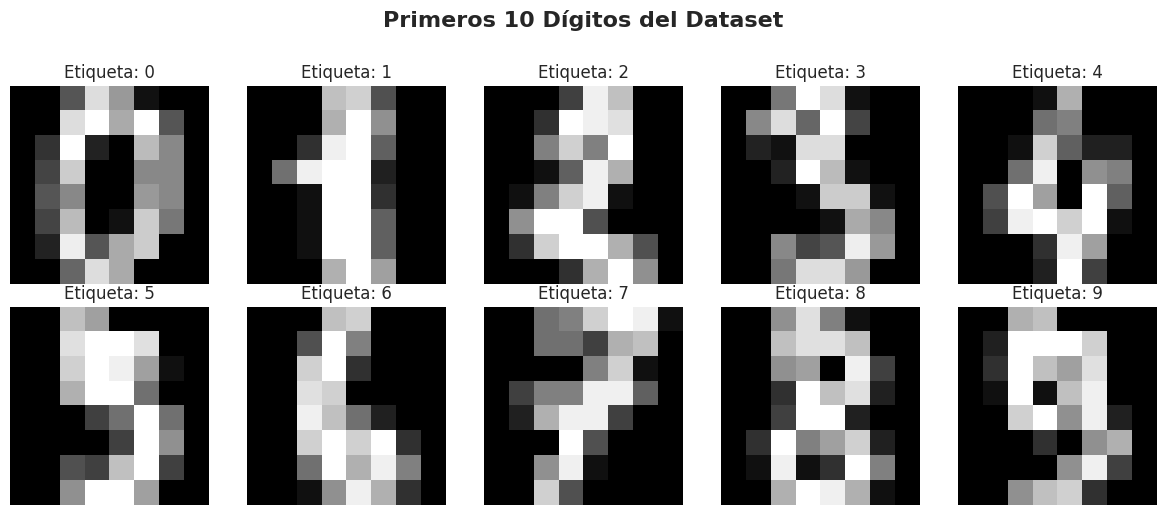

In [6]:
# TODO: Visualizar los primeros 10 dígitos del dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    # Cada imagen es de 8x8 píxeles
    imagen = digits.images[i]
    axes[i].imshow(imagen, cmap="gray")
    axes[i].set_title(f"Etiqueta: {digits.target[i]}", fontsize=12)
    axes[i].axis("off")

plt.suptitle("Primeros 10 Dígitos del Dataset", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

### 2.2 Visualizar un Ejemplo por Clase

**Instrucciones:** Muestra un ejemplo de cada dígito (0-9).

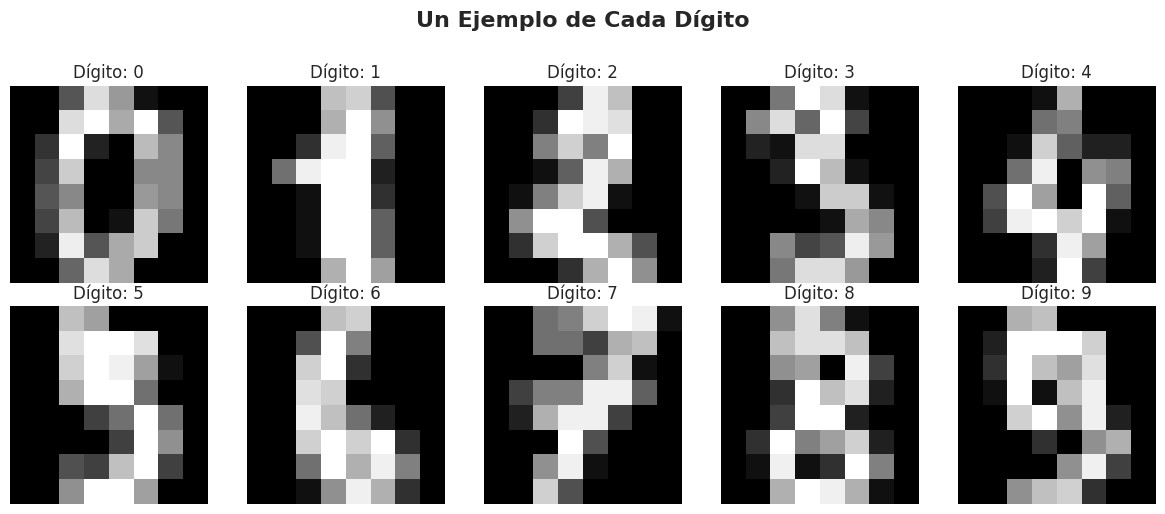

In [7]:
# TODO: Mostrar un ejemplo de cada dígito (0-9)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for digito in range(10):
    # Encontrar el primer índice donde aparece este dígito
    indice = np.where(y == digito)[0][0]
    imagen = digits.images[indice]

    axes[digito].imshow(imagen, cmap="gray")
    axes[digito].set_title(f"Dígito: {digito}", fontsize=12)
    axes[digito].axis("off")

plt.suptitle("Un Ejemplo de Cada Dígito", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

### 2.3 Entender la Representación de los Datos

**Instrucciones:** Examina cómo se representan los dígitos numéricamente.

In [8]:
# TODO: Mostrar la matriz de píxeles de un dígito y su vector de características
ejemplo_idx = 0

print(f"Etiqueta del ejemplo: {y[ejemplo_idx]}\n")

print("Matriz de 8x8 píxeles (valores de intensidad):")
print(digits.images[ejemplo_idx])

print("\nVector de características (64 valores aplanados):")
print(f"Forma: {X[ejemplo_idx].shape}")
print(X[ejemplo_idx])

Etiqueta del ejemplo: 0

Matriz de 8x8 píxeles (valores de intensidad):
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Vector de características (64 valores aplanados):
Forma: (64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


**✍️ PREGUNTA 2:** Cada imagen es de 8x8 píxeles, pero en `X` cada muestra tiene 64 características. ¿Por qué?

**TU RESPUESTA:**
```
Se tienen 8 columnas y 8 filas, teniendo 64 pixeles. No se usa la imagen como matriz, se convierte a una lista de números. Estos 64 pixeles se convierten a 64 valores, cada valor representa la intensidad de un pixel, por eso en X cada muestra tiene 64 características.

---

## Parte 3: Preparación de Datos

### 3.1 División Train-Test

**Instrucciones:** Divide el dataset en conjuntos de entrenamiento y prueba usando una proporción 80-20.

In [9]:
# TODO: Dividir los datos en entrenamiento (80%) y prueba (20%)
# Usa random_state=42 para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(
    f"\nProporción: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}% train, {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}% test"
)

Tamaño del conjunto de entrenamiento: 1437 muestras
Tamaño del conjunto de prueba: 360 muestras

Proporción: 80.0% train, 20.0% test


**✍️ PREGUNTA 3:** ¿Por qué usamos `stratify=y` en la división? ¿Qué pasaría si no lo usáramos?

**TU RESPUESTA:**
```
stratify=y se usa para asegurarse que en el conjunto de entrenamiento y en de la prueba se mantengan la misma proporción de clases que el dataset original. Es importante para que haya un equilibrio en los datos. 
Si no lo usáramos, la división sería aleatoria y podría pasar que algunas clases aparezcan más en un conjunto que en otro o que falte alguna. Haría que la evaluación del modelo no fuera confiable.
```

### 3.2 Normalización de Datos

**Instrucciones:** Aunque la Regresión Logística no es tan sensible a la escala como K-Means, normalizar los datos puede mejorar la convergencia del algoritmo de optimización.

In [10]:
# TODO: Verificar el rango de valores de los píxeles
print(f"Valor mínimo en X: {X.min()}")
print(f"Valor máximo en X: {X.max()}")
print("\nLos valores ya están en el rango [0, 16]")

# Para Regresión Logística, es común normalizar a [0, 1]
# TODO: Normalizar los datos dividiendo entre el valor máximo
X_train_norm = X_train / 16.0
X_test_norm = X_test / 16.0

print("\nDespués de normalización:")
print(f"Valor mínimo: {X_train_norm.min()}")
print(f"Valor máximo: {X_train_norm.max()}")

Valor mínimo en X: 0.0
Valor máximo en X: 16.0

Los valores ya están en el rango [0, 16]

Después de normalización:
Valor mínimo: 0.0
Valor máximo: 1.0


---

## Parte 4: Entrenamiento del Modelo

### 4.1 Modelo Baseline: Regresión Logística Simple

**Instrucciones:** Entrena una Regresión Logística con parámetros por defecto.

In [11]:
# TODO: Crear y entrenar el modelo de Regresión Logística
# Usa max_iter=10000 para asegurar convergencia
modelo_baseline = LogisticRegression(max_iter=10000, random_state=42)

# Entrenar el modelo
print("Entrenando modelo baseline...")
modelo_baseline.fit(X_train_norm, y_train)
print("✓ Modelo entrenado exitosamente")

Entrenando modelo baseline...
✓ Modelo entrenado exitosamente


**📚 Nota Teórica:** La Regresión Logística para clasificación multiclase usa el enfoque **One-vs-Rest (OvR)** por defecto en scikit-learn. Esto significa que entrena 10 clasificadores binarios, uno para cada dígito.

### 4.2 Realizar Predicciones

**Instrucciones:** Usa el modelo entrenado para hacer predicciones en el conjunto de prueba.

In [12]:
# TODO: Hacer predicciones en el conjunto de prueba
y_pred_baseline = modelo_baseline.predict(X_test_norm)

# Mostrar algunas predicciones
print("Primeras 10 predicciones:")
print(f"Predicciones: {y_pred_baseline[:10]}")
print(f"Valores reales: {y_test[:10]}")

Primeras 10 predicciones:
Predicciones: [5 2 8 6 7 2 6 2 6 5]
Valores reales: [5 2 8 1 7 2 6 2 6 5]


---

## Parte 5: Evaluación del Modelo

### 5.1 Métricas Básicas

**Instrucciones:** Calcula accuracy, precision, recall y F1-score para el modelo baseline.

In [13]:
# TODO: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline, average="macro")
recall = recall_score(y_test, y_pred_baseline, average="macro")
f1 = f1_score(y_test, y_pred_baseline, average="macro")

print("=" * 60)
print("📊 MÉTRICAS DE EVALUACIÓN - MODELO BASELINE")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 60)

📊 MÉTRICAS DE EVALUACIÓN - MODELO BASELINE
Accuracy:  0.9556 (95.56%)
Precision: 0.9552
Recall:    0.9552
F1-Score:  0.9549


**✍️ PREGUNTA 4:** ¿Qué significa que el modelo tenga un accuracy de ~95%? ¿Es esto suficientemente bueno para una aplicación real?

**TU RESPUESTA:**
```
Un accuracy del 95% significa que el modelo clasifica correctamente 95 de cada 100 imágenes. 
Para una aplicación real se tendría que evaluar el riesgo, es decir, el tipo de errores que comete y el impacto que podrían tener esos errores. 
```

### 5.2 Classification Report

**Instrucciones:** Genera un reporte de clasificación detallado por clase.

In [14]:
# TODO: Generar y mostrar el classification report
print("\n📋 REPORTE DE CLASIFICACIÓN POR DÍGITO")
print("=" * 70)
print(
    classification_report(
        y_test, y_pred_baseline, target_names=[str(i) for i in range(10)]
    )
)


📋 REPORTE DE CLASIFICACIÓN POR DÍGITO
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.88      0.83      0.86        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.92      1.00      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      0.94      0.96        36
           7       0.97      1.00      0.99        36
           8       0.91      0.89      0.90        35
           9       0.94      0.92      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



**✍️ PREGUNTA 5:** Observa el reporte de clasificación. ¿Hay algún dígito que sea particularmente difícil de clasificar? ¿Por qué crees que sea así?

**TU RESPUESTA:**
```
Si, el dígito 1. Tiene la precision, recall y f1-score más bajas comparando con los otros dígitos. Se podría decir que el modelo se equivoca más veces al identificarlo. Probablemente es porque depende de como se escribe el 1 se puede confundir más fácil el modelo con los otros dígitos.
```

---

## Parte 6: Visualización de Resultados

### 6.1 Matriz de Confusión

**Instrucciones:** Crea y visualiza la matriz de confusión para entender qué dígitos se confunden entre sí.

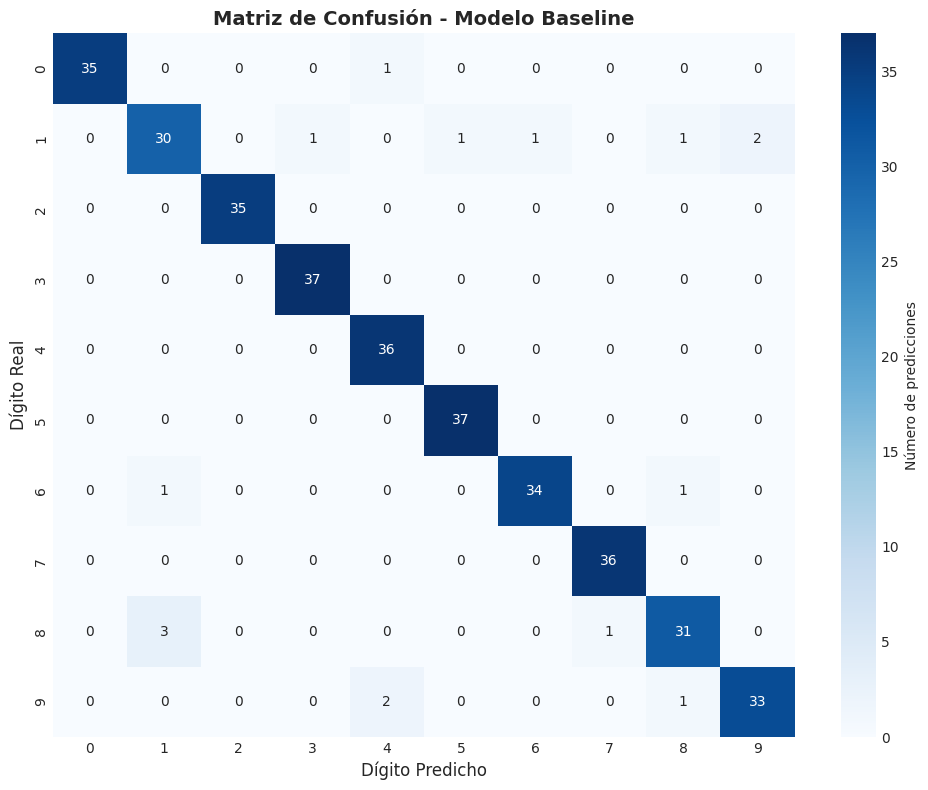

In [15]:
# TODO: Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_baseline)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar_kws={"label": "Número de predicciones"},
)
plt.xlabel("Dígito Predicho", fontsize=12)
plt.ylabel("Dígito Real", fontsize=12)
plt.title("Matriz de Confusión - Modelo Baseline", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**✍️ PREGUNTA 6:** En la matriz de confusión, los valores en la diagonal representan clasificaciones correctas. ¿Qué representan los valores fuera de la diagonal? ¿Cuáles son los pares de dígitos que más se confunden?

**TU RESPUESTA:**
```
Los valores fuera de la diagonal representan errores de clasificación, los casos donde el modelo confundió un dígito con otro diferente.
Los pares que más se confunden son el 8 con el 1, también el 9 con el 4, pero en especial el 1 se confunde con varios.
```

### 6.2 Matriz de Confusión Normalizada

**Instrucciones:** Visualiza la matriz de confusión normalizada por filas para ver proporciones.

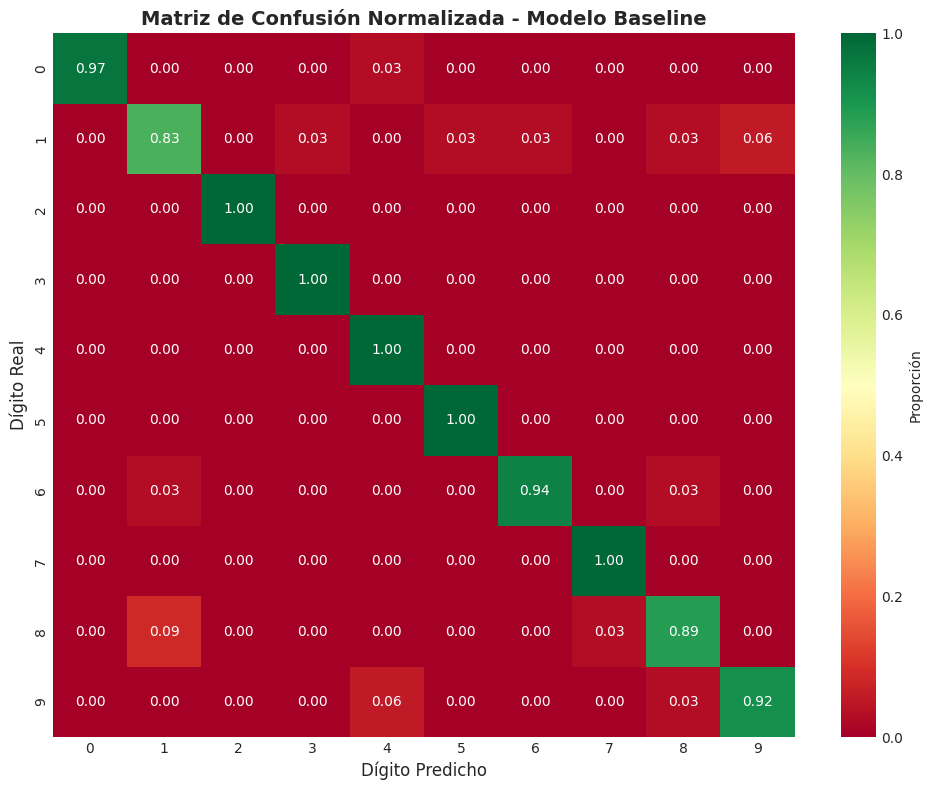

In [16]:
# TODO: Calcular matriz de confusión normalizada
cm_norm = confusion_matrix(y_test, y_pred_baseline, normalize="true")

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    xticklabels=range(10),
    yticklabels=range(10),
    cbar_kws={"label": "Proporción"},
    vmin=0,
    vmax=1,
)
plt.xlabel("Dígito Predicho", fontsize=12)
plt.ylabel("Dígito Real", fontsize=12)
plt.title(
    "Matriz de Confusión Normalizada - Modelo Baseline", fontsize=14, fontweight="bold"
)
plt.tight_layout()
plt.show()

---

## Parte 7: Análisis de Errores

### 7.1 Identificar Clasificaciones Incorrectas

**Instrucciones:** Encuentra y visualiza algunos ejemplos de dígitos que el modelo clasificó incorrectamente.

In [17]:
# TODO: Encontrar índices de predicciones incorrectas
indices_incorrectos = np.where(y_test != y_pred_baseline)[0]

print(
    f"Total de clasificaciones incorrectas: {len(indices_incorrectos)} de {len(y_test)}"
)
print(f"Tasa de error: {len(indices_incorrectos)/len(y_test)*100:.2f}%")

Total de clasificaciones incorrectas: 16 de 360
Tasa de error: 4.44%


### 7.2 Visualizar Errores

**Instrucciones:** Visualiza los primeros 10 dígitos mal clasificados.

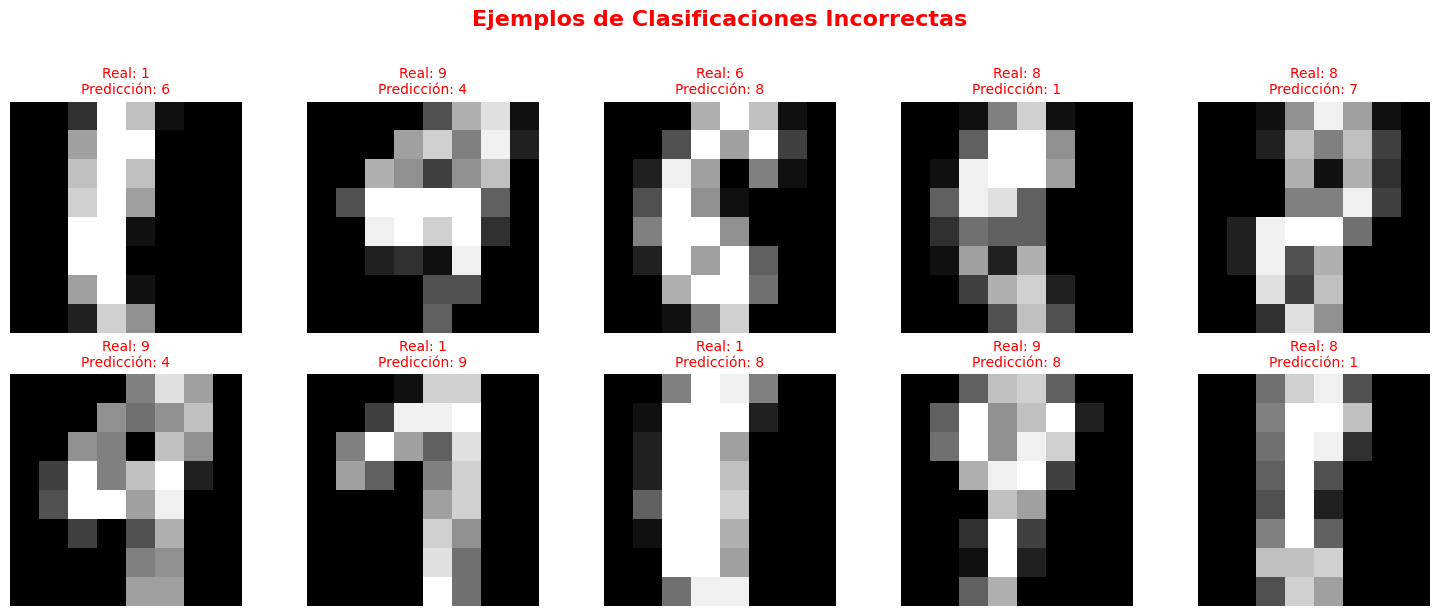

In [18]:
# TODO: Visualizar los primeros 10 errores
num_errores_mostrar = min(10, len(indices_incorrectos))

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(num_errores_mostrar):
    idx = indices_incorrectos[i]
    # Obtener el índice original en el dataset completo
    idx_original = np.where((X == X_test[idx]).all(axis=1))[0][0]

    imagen = digits.images[idx_original]
    axes[i].imshow(imagen, cmap="gray")
    axes[i].set_title(
        f"Real: {y_test[idx]}\nPredicción: {y_pred_baseline[idx]}",
        fontsize=10,
        color="red",
    )
    axes[i].axis("off")

plt.suptitle(
    "Ejemplos de Clasificaciones Incorrectas",
    fontsize=16,
    fontweight="bold",
    color="red",
    y=1.02,
)
plt.tight_layout()
plt.show()

**✍️ PREGUNTA 7:** Observa los dígitos mal clasificados. ¿Puedes identificar por qué el modelo se equivocó en algunos casos? ¿Son errores comprensibles?

**TU RESPUESTA:**
```
Si, los errores si son comprensibles. En varias imágenes los dígitos tienen formas muy parecidas, como las imágenes son pequeñas 8x8 y no hay tan buena resolución, puede ser que pequeños cambios en el trazo hagan que un número se vea más similar a otro.
```

### 7.3 Análisis de Confianza en las Predicciones

**Instrucciones:** Examina la confianza (probabilidades) del modelo en sus predicciones incorrectas.

In [20]:
# TODO: Obtener probabilidades de predicción
y_proba = modelo_baseline.predict_proba(X_test_norm)

# Para cada error, mostrar la confianza de la predicción
print("Análisis de confianza en predicciones incorrectas:\n")
print("=" * 70)

for i in range(min(5, len(indices_incorrectos))):
    idx = indices_incorrectos[i]
    probabilidades = y_proba[idx]
    clase_predicha = y_pred_baseline[idx]
    clase_real = y_test[idx]

    confianza_prediccion = probabilidades[clase_predicha]
    probabilidad_clase_real = probabilidades[clase_real]

    print(f"Ejemplo {i+1}:")
    print(f"  Clase real: {clase_real}")
    print(f"  Clase predicha: {clase_predicha}")
    print(
        f"  Confianza en predicción: {confianza_prediccion:.4f} ({confianza_prediccion*100:.2f}%)"
    )
    print(
        f"  Probabilidad de la clase real: {probabilidad_clase_real:.4f} ({probabilidad_clase_real*100:.2f}%)"
    )
    print("-" * 70)

Análisis de confianza en predicciones incorrectas:

Ejemplo 1:
  Clase real: 1
  Clase predicha: 6
  Confianza en predicción: 0.3696 (36.96%)
  Probabilidad de la clase real: 0.1980 (19.80%)
----------------------------------------------------------------------
Ejemplo 2:
  Clase real: 9
  Clase predicha: 4
  Confianza en predicción: 0.3588 (35.88%)
  Probabilidad de la clase real: 0.3120 (31.20%)
----------------------------------------------------------------------
Ejemplo 3:
  Clase real: 6
  Clase predicha: 8
  Confianza en predicción: 0.6389 (63.89%)
  Probabilidad de la clase real: 0.1174 (11.74%)
----------------------------------------------------------------------
Ejemplo 4:
  Clase real: 8
  Clase predicha: 1
  Confianza en predicción: 0.8475 (84.75%)
  Probabilidad de la clase real: 0.0471 (4.71%)
----------------------------------------------------------------------
Ejemplo 5:
  Clase real: 8
  Clase predicha: 7
  Confianza en predicción: 0.4786 (47.86%)
  Probabilidad de l

**✍️ PREGUNTA 8:** ¿Hay casos donde el modelo estuvo "casi correcto" (alta probabilidad para la clase real)? ¿Qué implica esto para aplicaciones reales?

**TU RESPUESTA:**
```
Si, en el ejemplo 2 y 5 estuvo casi correcto, ya que la probabilidad de la clase real estaba muy cerca de la clase que predijo.
En aplicaciones reales es importante, porque cuando las probabilidades se parecen se podría tomar una decisión con más cuidado.
```

---

## Parte 8: Comparación de Modelos

### 8.1 Modelo con Regularización Fuerte (Ridge)

**Instrucciones:** Entrena un modelo con mayor regularización (C pequeño = mayor penalización).

In [21]:
# TODO: Entrenar modelo con C=0.01 (regularización fuerte)
modelo_ridge = LogisticRegression(penalty="l2", C=0.01, max_iter=10000, random_state=42)

print("Entrenando modelo con regularización fuerte (Ridge)...")
modelo_ridge.fit(X_train_norm, y_train)
print("✓ Modelo Ridge entrenado")

# Hacer predicciones
y_pred_ridge = modelo_ridge.predict(X_test_norm)

# Calcular métricas
acc_ridge = accuracy_score(y_test, y_pred_ridge)
f1_ridge = f1_score(y_test, y_pred_ridge, average="macro")

print(f"\nAccuracy: {acc_ridge:.4f}")
print(f"F1-Score: {f1_ridge:.4f}")

Entrenando modelo con regularización fuerte (Ridge)...


/workspaces/mineria_datos/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


✓ Modelo Ridge entrenado

Accuracy: 0.8861
F1-Score: 0.8830


### 8.2 Modelo con Regularización Débil

**Instrucciones:** Entrena un modelo con menor regularización (C grande = menor penalización).

In [22]:
# TODO: Entrenar modelo con C=100 (regularización débil)
modelo_flexible = LogisticRegression(
    penalty="l2", C=100, max_iter=10000, random_state=42
)

print("Entrenando modelo con regularización débil...")
modelo_flexible.fit(X_train_norm, y_train)
print("✓ Modelo flexible entrenado")

# Hacer predicciones
y_pred_flexible = modelo_flexible.predict(X_test_norm)

# Calcular métricas
acc_flexible = accuracy_score(y_test, y_pred_flexible)
f1_flexible = f1_score(y_test, y_pred_flexible, average="macro")

print(f"\nAccuracy: {acc_flexible:.4f}")
print(f"F1-Score: {f1_flexible:.4f}")

Entrenando modelo con regularización débil...


/workspaces/mineria_datos/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


✓ Modelo flexible entrenado

Accuracy: 0.9583
F1-Score: 0.9581


### 8.3 Comparación de Resultados

**Instrucciones:** Compara los tres modelos y visualiza sus diferencias.

In [27]:
# TODO: Crear tabla comparativa
resultados = pd.DataFrame(
    {
        "Modelo": ["Baseline (C=1)", "Ridge (C=0.01)", "Flexible (C=100)"],
        "Accuracy": [accuracy, acc_ridge, acc_flexible],
        "F1-Score": [f1, f1_ridge, f1_flexible],
        "Regularización": ["Media", "Fuerte", "Débil"],
    }
)

print("\n" + "=" * 80)
print("📊 COMPARACIÓN DE MODELOS")
print("=" * 80)
print(resultados.to_string(index=False))
print("=" * 80)


📊 COMPARACIÓN DE MODELOS
          Modelo  Accuracy  F1-Score Regularización
  Baseline (C=1)  0.955556  0.954857          Media
  Ridge (C=0.01)  0.886111  0.882981         Fuerte
Flexible (C=100)  0.958333  0.958120          Débil


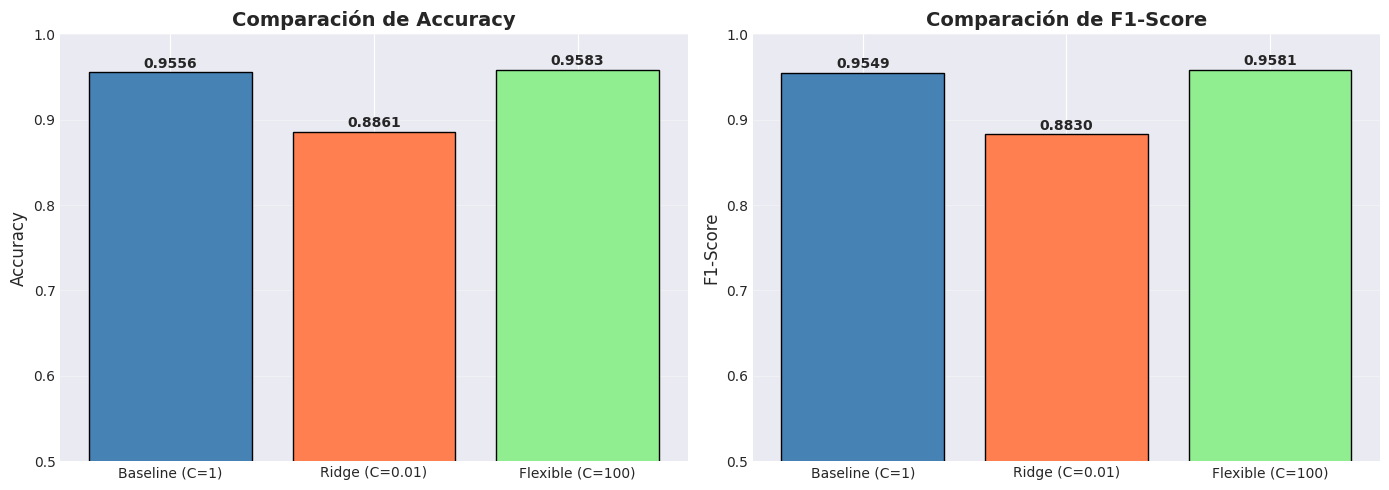

In [28]:
# TODO: Visualizar comparación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras para Accuracy
axes[0].bar(
    resultados["Modelo"],
    resultados["Accuracy"],
    color=["steelblue", "coral", "lightgreen"],
    edgecolor="black",
)
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Comparación de Accuracy", fontsize=14, fontweight="bold")
axes[0].set_ylim([0.5, 1.0])
axes[0].grid(axis="y", alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(resultados["Accuracy"]):
    axes[0].text(
        i,
        v + 0.002,
        f"{v:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# Gráfico de barras para F1-Score
axes[1].bar(
    resultados["Modelo"],
    resultados["F1-Score"],
    color=["steelblue", "coral", "lightgreen"],
    edgecolor="black",
)
axes[1].set_ylabel("F1-Score", fontsize=12)
axes[1].set_title("Comparación de F1-Score", fontsize=14, fontweight="bold")
axes[1].set_ylim([0.5, 1.0])
axes[1].grid(axis="y", alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(resultados["F1-Score"]):
    axes[1].text(
        i,
        v + 0.002,
        f"{v:.4f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

**✍️ PREGUNTA 9:** ¿Qué modelo tuvo el mejor desempeño? ¿El efecto de la regularización fue significativo en este dataset? ¿Por qué crees que ocurrió esto?

**TU RESPUESTA:**
```
El modelo con mejor desempeño fue el flexible, ya que obtuvo ya mayor accuracy (0.9583) y F1-score (0.9581). Aunque el modelo baseline tuvo resultados muy similares.
El efecto de regularización fue significativo. Cuando tenía C pequeña obtuve mayor penalización, el modelo se volvió demasiado simple y no logró capturar bien los patrones. En Ridge sucedió eso, lo que causó que el desempeño bajara bastante.
```

### 8.4 Evaluación en Datos de Entrenamiento vs. Prueba

**Instrucciones:** Compara el desempeño de cada modelo en train vs. test para detectar sobreajuste.

In [29]:
# TODO: Calcular accuracy en train y test para cada modelo
modelos = {
    "Baseline (C=1)": modelo_baseline,
    "Ridge (C=0.01)": modelo_ridge,
    "Flexible (C=100)": modelo_flexible,
}

resultados_train_test = []

for nombre, modelo in modelos.items():
    # Accuracy en train
    y_train_pred = modelo.predict(X_train_norm)
    acc_train = accuracy_score(y_train, y_train_pred)

    # Accuracy en test
    y_test_pred = modelo.predict(X_test_norm)
    acc_test = accuracy_score(y_test, y_test_pred)

    # Diferencia (gap)
    gap = acc_train - acc_test

    resultados_train_test.append(
        {
            "Modelo": nombre,
            "Accuracy Train": acc_train,
            "Accuracy Test": acc_test,
            "Gap": gap,
        }
    )

df_train_test = pd.DataFrame(resultados_train_test)

print("\n" + "=" * 90)
print("📊 ANÁLISIS DE SOBREAJUSTE (OVERFITTING)")
print("=" * 90)
print(df_train_test.to_string(index=False))
print("=" * 90)
print("\n💡 Nota: Un gap grande indica posible sobreajuste")


📊 ANÁLISIS DE SOBREAJUSTE (OVERFITTING)
          Modelo  Accuracy Train  Accuracy Test      Gap
  Baseline (C=1)        0.986778       0.955556 0.031222
  Ridge (C=0.01)        0.920668       0.886111 0.034557
Flexible (C=100)        1.000000       0.958333 0.041667

💡 Nota: Un gap grande indica posible sobreajuste


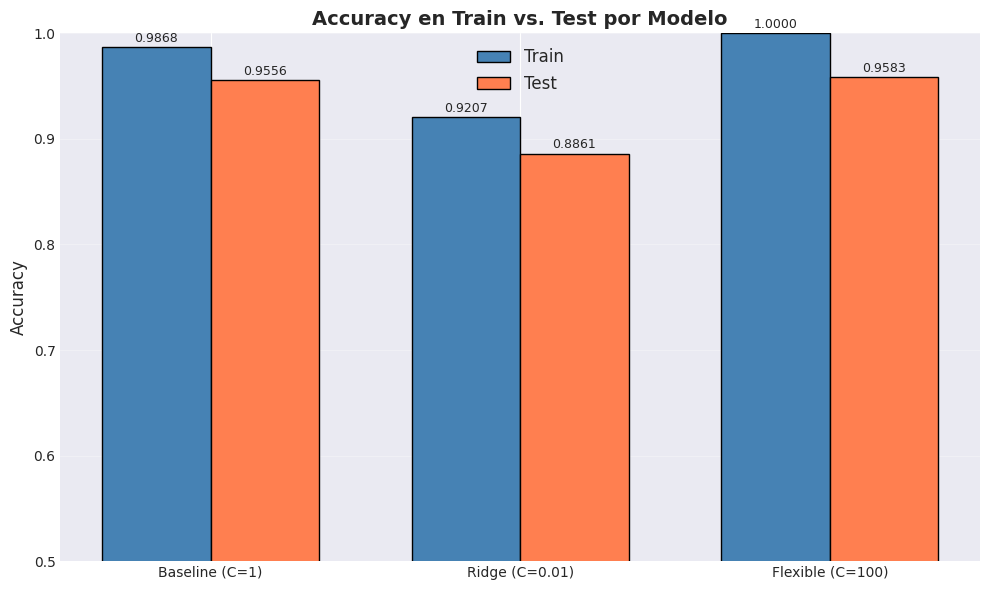

In [30]:
# TODO: Visualizar train vs test
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(df_train_test))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    df_train_test["Accuracy Train"],
    width,
    label="Train",
    color="steelblue",
    edgecolor="black",
)
bars2 = ax.bar(
    x + width / 2,
    df_train_test["Accuracy Test"],
    width,
    label="Test",
    color="coral",
    edgecolor="black",
)

ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Accuracy en Train vs. Test por Modelo", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(df_train_test["Modelo"])
ax.legend(fontsize=12)
ax.set_ylim([0.5, 1.0])
ax.grid(axis="y", alpha=0.3)

# Añadir valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.002,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

for bar in bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.002,
        f"{height:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

**✍️ PREGUNTA 10:** ¿Alguno de los modelos muestra signos claros de sobreajuste? ¿Cómo lo identificaste? Conecta esto con el concepto de trade-off sesgo-varianza del capítulo.

**TU RESPUESTA:**
```
El modelo flexible muestra signos de sobreajuste, ya que tiene el gap más grande (0.041667). Significa que aprende muy bien los datos de entrenamiento, pero baja un poco su desempeño con datos nuevos.
Lo identifiqué comparando la diferencia entre train y test, entre más grande sea el gap, hay más probabilidad de sobreajuste.
Se relaciona con el trade-off sesgo-varianza ya que en el modelo flexible al tener baja regularización hace que el sesgo disminuya pero la varianza aumente. En el de ridge tiene más sesgo y menos varianza, al ser muy simple.
```

## Ejercicio:

Implementa validación cruzada para obtener el mejor hiperparámetro.

In [32]:
# TODO: Implementar validación cruzada para encontrar el mejor hiperparámetro C
from sklearn.model_selection import GridSearchCV

# Definir modelo base
modelo_cv = LogisticRegression(max_iter=10000, random_state=42)

# Definir valores de C a probar
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

print("Entrenando modelo con validación cruzada...")

# Configurar GridSearch con 5 folds
grid_search = GridSearchCV(modelo_cv, param_grid, cv=5, scoring="accuracy")

# Entrenar
grid_search.fit(X_train_norm, y_train)

print("✓ Validación cruzada completada")

# Mejor hiperparámetro
print(f"\nMejor valor de C: {grid_search.best_params_['C']}")
print(f"Mejor accuracy promedio (CV): {grid_search.best_score_:.4f}")

# Evaluar en test
mejor_modelo = grid_search.best_estimator_
y_pred_mejor = mejor_modelo.predict(X_test_norm)

acc_mejor = accuracy_score(y_test, y_pred_mejor)

print(f"\nAccuracy en test con mejor C: {acc_mejor:.4f}")

Entrenando modelo con validación cruzada...
✓ Validación cruzada completada

Mejor valor de C: 10
Mejor accuracy promedio (CV): 0.9680

Accuracy en test con mejor C: 0.9583


---

## Parte 9: Reflexión Final y Conclusiones

### 9.1 Resumen de Aprendizajes

**✍️ PREGUNTA 11:** Basándote en toda la tarea, responde:

1. **¿Qué aprendiste sobre la Regresión Logística como método de clasificación?**
```
Aprendí que no sólo sirve para clasificar, también nos da las probabilidades para cada clase, para saber que tan seguro está el modelo. También como la regularización afecta el desempeño y como escoger bien el valor de C puede mejorar o empeorar resultados.
```

2. **¿Por qué es importante analizar más allá del accuracy? ¿Qué otras métricas fueron útiles?**
```
Es importante porque el accuracy solo nos dice el porcetanje de lo que se obtiene correctamente, pero no nos enseña como se comporta el modelo en cada clase. Métricas como precision, recall y F1-score fueron útiles porque nos ayudan a evaluar mejor el equilibrio entre errores y aciertos, especialmente cuando hay clases que se pueden confundir más.
```

3. **¿Cómo te ayudó la visualización de errores a entender el comportamiento del modelo?**
```
La visualización me ayudó a ver que muchos errores eran entre dígitos que se parecen visualmente. Me ayudó a entender que el modelo no se equivocó al azar, si no son casos en donde la forma del número puede causar ambigüedad.
```

4. **Si tuvieras que desplegar este modelo en producción para procesar cheques bancarios, ¿qué consideraciones adicionales tendrías?**
```
Consideraría la confianza de las predicciones para detectar casos dudosos y que esos se revisen manualmente. También monitorear el desempeño con nuevos datos, evitar sobrejustes y asegurar que el modelo sea estable y confiable. Porque los errores en este contexto pueden traer graves consecuencias.
```